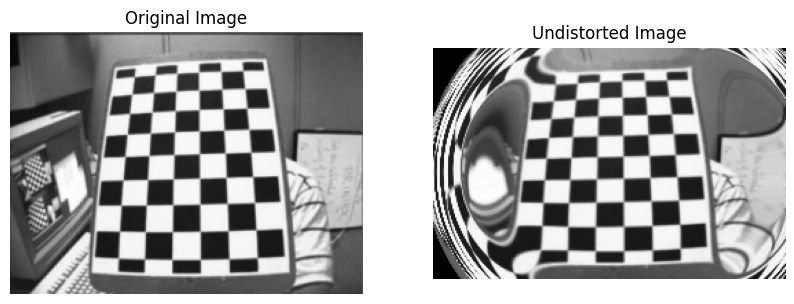

In [1]:
## you have to create "left" name folder and add image into left folder

import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

# Termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9, 3), np.float32)
objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images
objpoints = []  # 3d point in real world space
imgpoints = []  # 2d points in image plane

images = glob.glob('left/*.jpg')  # Read a series of images

gray = None  # Initialize gray to ensure it is defined

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert the image to gray
    
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)  # Refine the corner locations
        imgpoints.append(corners2)
        
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9, 6), corners2, ret)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

# Ensure that at least one image was processed
if gray is not None:
    # Calibration
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    img = cv2.imread('left/left12.jpg')
    h, w = img.shape[:2]
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
    
    # Undistort
    dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
    
    # Crop the image
    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]
    
    # Plot original and undistorted images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    ax[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Undistorted Image')
    ax[1].axis('off')
    plt.show()
else:
    print("No images were processed successfully.")
